<h1 align="center"> NAME:ANKITA YADAV</h1>

<h1 align="center"> TASK2: PREDICTION USING UNSUPERVISED LEARNING(IRIS) </h1>

<h2>Objective: From the given "IRIS" dataset,predict the optimum no. of clusters and represent it visually.</h2>

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

## Get the data

In [4]:
data=pd.read_csv("Iris.csv")

In [5]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Get some important information about data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.shape

(150, 6)

In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

###### There is no further use of id column in predicting no. of clusters (i.e. irrelevant column), so we can drop it.

In [10]:
data.drop("Id",axis=1,inplace=True)

In [12]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
data.shape

(150, 5)

# EDA(EXPLORATORY DATA ANALYSIS)

In [15]:
data["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

* It means the given dataset is balanced.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

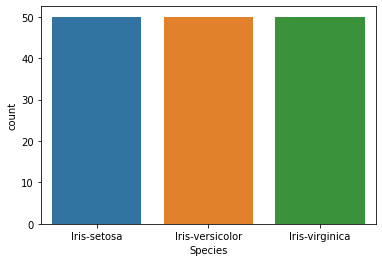

In [16]:
sns.countplot(data["Species"])

<AxesSubplot:>

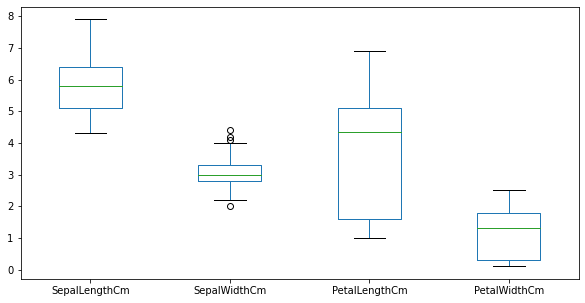

In [17]:
data.plot(kind="box",figsize=(10,5))

* Above graph shows sepalwidth have some outliears.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

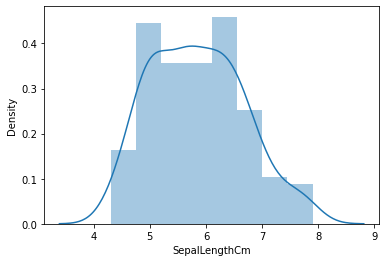

In [22]:
sns.distplot(data["SepalLengthCm"])

* The graph indicates that the sepal length is unimodal and normally distributed.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

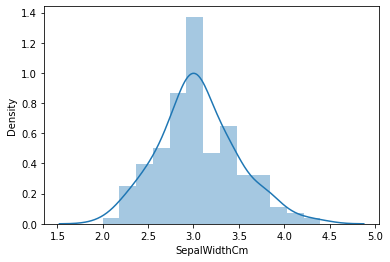

In [23]:
sns.distplot(data["SepalWidthCm"])

* The graph indicates that the sepal width is also unimodal and normally distributed.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

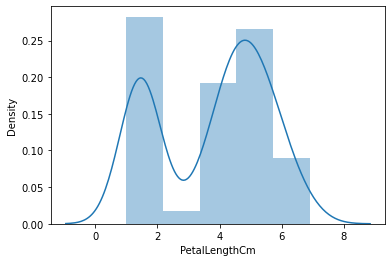

In [24]:
sns.distplot(data["PetalLengthCm"])

* The graph indicates that the petal length is Bimodal.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

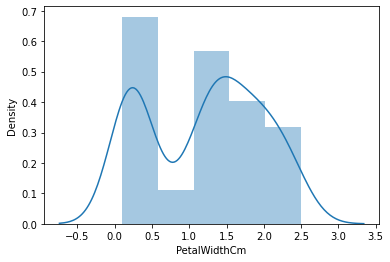

In [25]:
sns.distplot(data["PetalWidthCm"])

* The graph indicates that the petal width is also Bimodal.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


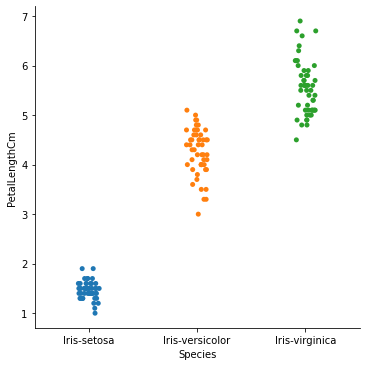

In [26]:
sns.catplot('Species',"PetalLengthCm",data=data)

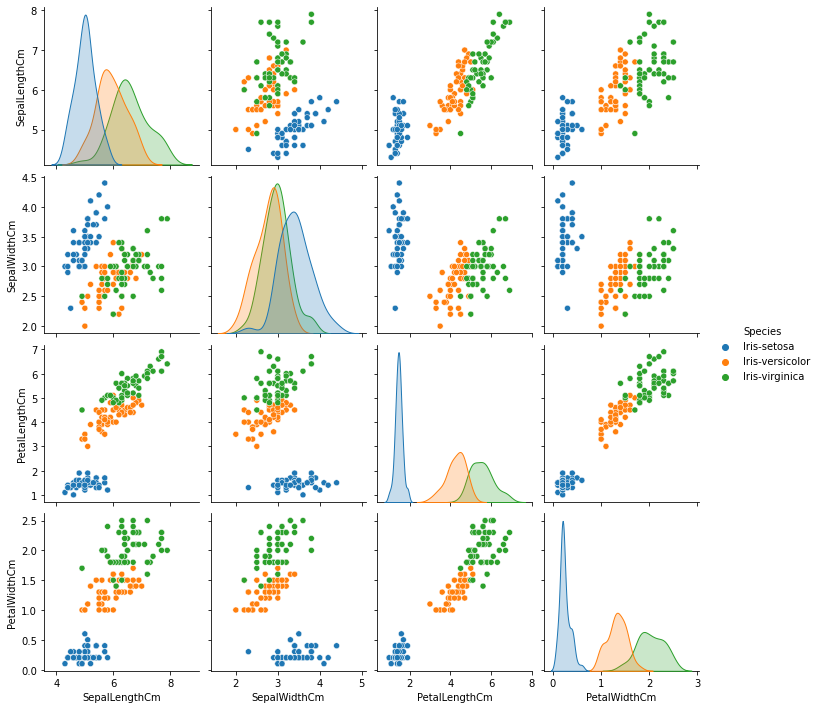

In [27]:
sns.pairplot(hue="Species",data=data)

By the above graph we can say setosa is seperable but versicolour and verginica are not as they overlapping each other. 

<AxesSubplot:>

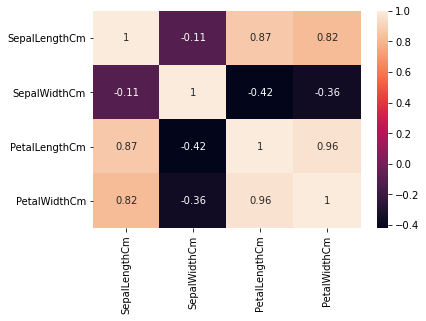

In [28]:
sns.heatmap(data.corr(),annot=True)

<h1 align="center"> KMEAN<h1>

In [30]:
x= data .iloc[:,[1,2,3]].values
s=[]
for i in range (1,11):
    kmeans= KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(x)
    s.append(kmeans.inertia_)

###### Visualize the result and check the optimal number of clusters using elbow method.

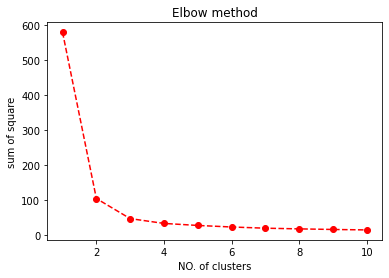

In [31]:
plt.plot(range(1,11),s,"go--",c="red")
plt.title("Elbow method")
plt.xlabel("NO. of clusters")
plt.ylabel("sum of square")
plt.show()

The above graph indicates that there are 3 clusters.

## APPLYING KMEANS

In [32]:
kmeans= KMeans(n_clusters=3,random_state=0)
pred=kmeans.fit_predict(x)

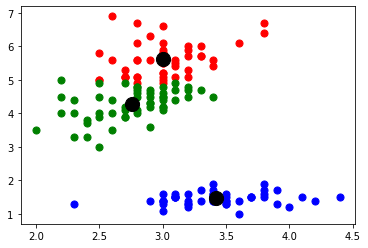

In [36]:
plt.scatter(x[pred == 0,0],x[pred == 0,1],s=50,c="red",label="Iris-setosa")
plt.scatter(x[pred == 1,0],x[pred == 1,1],s=50,c="blue",label="Iris-versiclour")
plt.scatter(x[pred == 2,0],x[pred == 2,1],s=50,c="green",label="Iris-verginica")

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c="black",label="centeroids")